In [8]:
from sentence_transformers import SentenceTransformer
import glob
from PIL import Image
from annoy import AnnoyIndex

In [4]:
files = glob.glob("images/*/*.jpg")
len(files)

629

In [5]:
img_list = [Image.open(filepath).convert('RGB') for filepath in files]
len(img_list)

629

In [6]:
model = SentenceTransformer('clip-ViT-B-32')

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [7]:
embeddings = model.encode(img_list, 
                              batch_size=32,
                              # device=args.device,
                              show_progress_bar=False)

In [26]:
embeddings.shape

(629, 512)

In [30]:
embeddings[0]

array([-4.61638004e-01, -4.50770378e-01, -3.36201727e-01, -7.45347738e-02,
        3.73375416e-01, -3.30971479e-02, -2.65241623e-01,  2.15901226e-01,
       -4.13082629e-01, -1.70083493e-02,  1.28792763e-01,  1.17299251e-01,
        6.68911099e-01,  3.47490728e-01, -3.13186675e-01,  1.65080428e-01,
        6.60770297e-01,  2.02808082e-02,  1.79571390e-01, -1.79951683e-01,
        1.19872242e-01,  3.93793523e-01, -1.54123038e-01, -6.48837984e-02,
        5.88689968e-02, -1.94392473e-01, -1.74583897e-01, -4.65298772e-01,
       -3.46715927e-01,  6.40166700e-02, -9.47434455e-03,  4.70851272e-01,
       -5.41067719e-02, -4.40876722e-01, -3.45046431e-01, -3.84814978e-01,
        7.57936537e-02, -9.96462852e-02, -1.75836712e-01, -2.06167161e-01,
       -1.78471625e-01, -2.29459554e-01,  2.11175516e-01, -1.46581918e-01,
        5.13911068e-01, -2.93173552e-01, -1.13141358e-01,  3.89644504e-01,
        5.23193181e-01, -5.75060844e-01, -1.87500954e-01, -1.34620875e-01,
       -6.37729019e-02, -

In [9]:
annoy_index = AnnoyIndex(512, metric='angular')

In [10]:
for idx, emb in enumerate(embeddings):
    annoy_index.add_item(idx, emb)
annoy_index.build(10)

True

In [11]:
query_emb = model.encode(["medieval drawing of a plant"], show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

36 1.2450408935546875


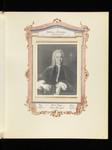

6 1.2451001405715942


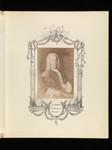

609 1.2471727132797241


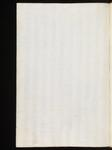

22 1.2487492561340332


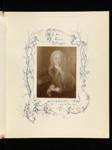

529 1.2499961853027344


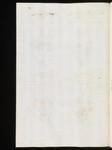

In [36]:
query_emb = model.encode(["portrait"], show_progress_bar=True)
closest_5_idx, closest_5_dist = annoy_index.get_nns_by_vector(query_emb[0], 5,
                                        include_distances=True)
for idx, dist in zip(closest_5_idx, closest_5_dist):
    print(idx, dist)
    display(img_list[idx])